# **1. Perkenalan Dataset**


Dataset yang digunakan dalam proyek ini berkaitan dengan Garis Kemiskinan di Indonesia, yang mencakup informasi tentang tingkat kemiskinan di berbagai provinsi berdasarkan berbagai faktor seperti jenis konsumsi (makanan & non-makanan), daerah (perkotaan & perdesaan), dan periode waktu.

1. **Sumber Dataset**:
- Dataset ini dapat diakses di Kaggle dengan nama **Dataset Kesejahteraan Pekerja Indonesia**.
- Data ini memuat data **Garis Kemiskinan per Kapita**, dengan pemisahan berdasarkan provinsi, tahun, periode survei, jenis pengeluaran, dan daerah tempat tinggal.
2. **Ketentuan Dataset**:
- Mengelompokkan provinsi di Indonesia berdasarkan pola garis kemiskinan mereka.
- Menentukan apakah ada provinsi dengan karakteristik kemiskinan yang mirip untuk membantu analisis sosial dan ekonomi.
- Mengidentifikasi pola perbedaan kemiskinan antara perkotaan dan perdesaan.

# **2. Import Library**

Pada tahap ini, kita akan mengimpor pustaka Python yang diperlukan untuk analisis data dan pembangunan model clustering.

In [1]:
import pandas as pd  # Untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Untuk visualisasi data
from yellowbrick.cluster import KElbowVisualizer  # Untuk menentukan jumlah cluster optimal
from sklearn.cluster import KMeans  # Algoritma clustering
from sklearn.metrics import silhouette_score  # Untuk evaluasi clustering
from sklearn.preprocessing import MinMaxScaler, LabelEncoder # Untuk preprocessing
from sklearn.decomposition import PCA # Untuk visualisasi hasil clustering
import seaborn as sns  # Untuk visualisasi data

# **3. Memuat Dataset**

Pada tahap ini, kita akan memuat dataset ke dalam notebook, untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar dan memastikan bahwa data sudah berhasil diimpor serta sesuai untuk analisis lebih lanjut.

In [2]:
# Memuat dataset
df = pd.read_csv('Dataset_clustering.csv')

# Menampilkan 5 baris pertama dataset
print("5 Baris Pertama Dataset:")
display(df.head())

# Menampilkan informasi dataset
print("\nInformasi Dataset:")
print(df.info())

# Menampilkan jumlah nilai yang hilang di setiap kolom
print("\nCek Missing Values:")
print(df.isnull().sum())

# Menampilkan statistik deskriptif untuk data numerik
print("\nStatistik Deskriptif:")
display(df.describe())

5 Baris Pertama Dataset:


,provinsi,jenis,daerah,tahun,periode,gk
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,306243.0
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,297479.0



Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5460 non-null   object 
 1   jenis     5460 non-null   object 
 2   daerah    5460 non-null   object 
 3   tahun     5460 non-null   int64  
 4   periode   5460 non-null   object 
 5   gk        5261 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 256.1+ KB
None

Cek Missing Values:
provinsi      0
jenis         0
daerah        0
tahun         0
periode       0
gk          199
dtype: int64

Statistik Deskriptif:


,tahun,gk
count,5460.000000,5261.000000
mean,2018.115385,303904.185516
std,2.577159,158176.024903
min,2013.000000,48561.000000
25%,2016.000000,144674.000000
50%,2018.000000,313294.000000
75%,2020.000000,410188.000000
max,2022.000000,872843.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, kita akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
#  Mengecek struktur dataset
print("Ukuran Dataset:", df.shape)
print("\nInformasi Dataset:")
print(df.info())

Ukuran Dataset: (5460, 6)

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5460 non-null   object 
 1   jenis     5460 non-null   object 
 2   daerah    5460 non-null   object 
 3   tahun     5460 non-null   int64  
 4   periode   5460 non-null   object 
 5   gk        5261 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 256.1+ KB
None


In [4]:
# Mengecek jumlah missing values lagi
print("\nCek Missing Values:")
print(df.isnull().sum())

# Mengisi missing values pada `gk` dengan median
df = df.assign(gk=df['gk'].fillna(df['gk'].median()))

# Mengecek ulang apakah masih ada missing values
print("\nMissing Values Setelah Imputasi:")
print(df.isnull().sum())



Cek Missing Values:
provinsi      0
jenis         0
daerah        0
tahun         0
periode       0
gk          199
dtype: int64

Missing Values Setelah Imputasi:
provinsi    0
jenis       0
daerah      0
tahun       0
periode     0
gk          0
dtype: int64


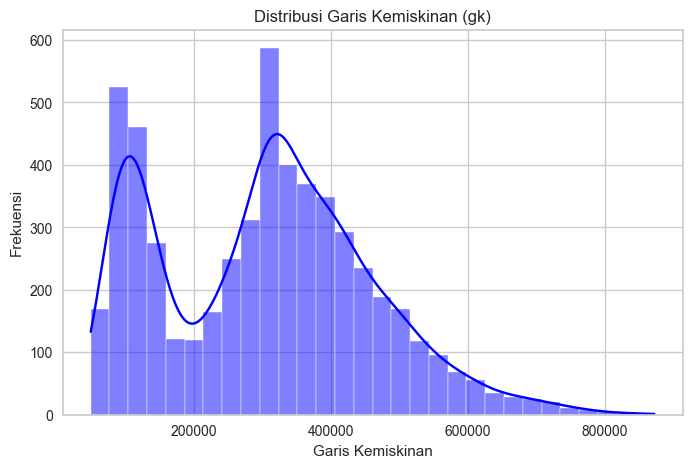

In [5]:
# Histogram distribusi `gk`
plt.figure(figsize=(8,5))
sns.histplot(df['gk'], bins=30, kde=True, color='blue')
plt.title("Distribusi Garis Kemiskinan (gk)")
plt.xlabel("Garis Kemiskinan")
plt.ylabel("Frekuensi")
plt.show()

In [6]:
# Cek berapa banyak provinsi yang memiliki garis kemiskinan di bawah 200.000
low_gk_count = df[df['gk'] <= 200000].shape[0]
print(f"Jumlah provinsi dengan garis kemiskinan <= 200.000: {low_gk_count}")

# Cek berapa banyak provinsi yang memiliki garis kemiskinan di rentang 200.000 – 400.000
mid_gk_count = df[df['gk'].between(200000, 400000)].shape[0]
print(f"Jumlah provinsi dengan garis kemiskinan antara 200.000 – 400.000: {mid_gk_count}")

Jumlah provinsi dengan garis kemiskinan <= 200.000: 1603
Jumlah provinsi dengan garis kemiskinan antara 200.000 – 400.000: 2416


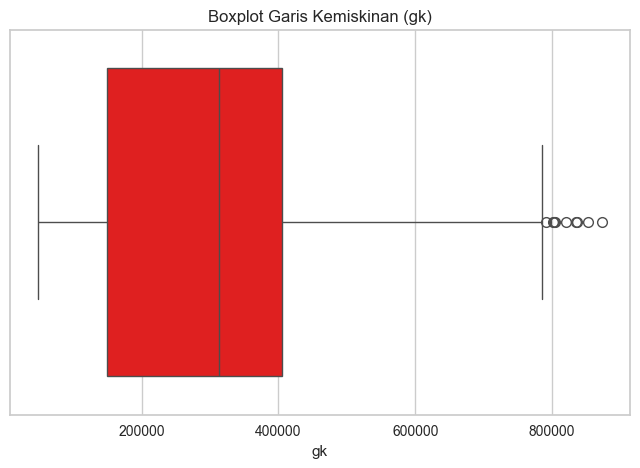

In [7]:
# Boxplot untuk mendeteksi outlier pada `gk`
plt.figure(figsize=(8,5))
sns.boxplot(x=df['gk'], color='red')
plt.title("Boxplot Garis Kemiskinan (gk)")
plt.show()

In [8]:
# Cek provinsi mana saja yang memiliki gk > 600.000.
outliers = df[df['gk'] > 600000]
display(outliers[['provinsi', 'gk']])

,provinsi,gk
146,ACEH,606394.0
147,ACEH,646232.0
151,ACEH,602900.0
155,ACEH,617293.0
303,SUMATERA UTARA,615227.0
...,...,...
5298,PAPUA,608205.0
5299,PAPUA,646116.0
5301,PAPUA,600795.0
5302,PAPUA,629175.0


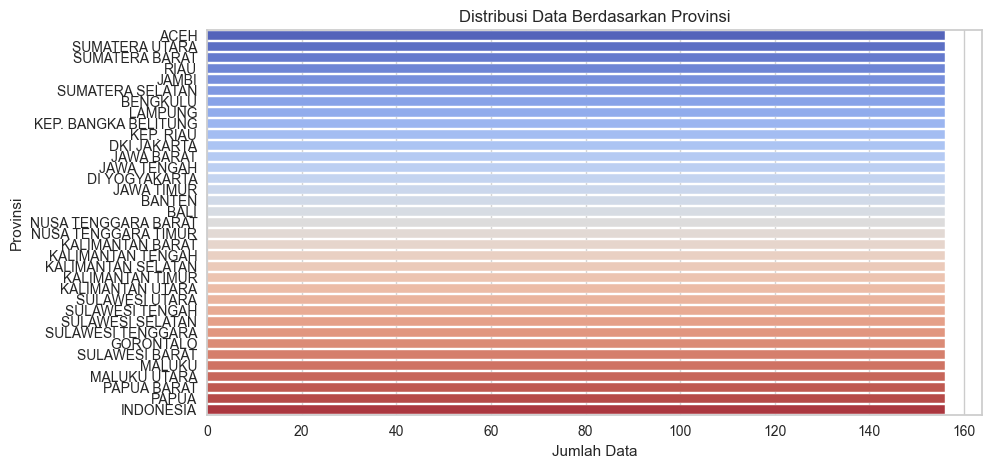

In [9]:
# Visualisasi distribusi provinsi
plt.figure(figsize=(10,5))
sns.countplot(y=df['provinsi'], hue=df['provinsi'], order=df['provinsi'].value_counts().index, palette='coolwarm', legend=False)
plt.title("Distribusi Data Berdasarkan Provinsi")
plt.xlabel("Jumlah Data")
plt.ylabel("Provinsi")
plt.show()

In [10]:
# Cek apakah provinsi "INDONESIA" ada
print("Cek apakah provinsi INDONESIA ada")
print(df['provinsi'].unique())

# Akan dihapus di data preprocessing

Cek apakah provinsi INDONESIA ada
['ACEH' 'SUMATERA UTARA' 'SUMATERA BARAT' 'RIAU' 'JAMBI'
 'SUMATERA SELATAN' 'BENGKULU' 'LAMPUNG' 'KEP. BANGKA BELITUNG'
 'KEP. RIAU' 'DKI JAKARTA' 'JAWA BARAT' 'JAWA TENGAH' 'DI YOGYAKARTA'
 'JAWA TIMUR' 'BANTEN' 'BALI' 'NUSA TENGGARA BARAT' 'NUSA TENGGARA TIMUR'
 'KALIMANTAN BARAT' 'KALIMANTAN TENGAH' 'KALIMANTAN SELATAN'
 'KALIMANTAN TIMUR' 'KALIMANTAN UTARA' 'SULAWESI UTARA' 'SULAWESI TENGAH'
 'SULAWESI SELATAN' 'SULAWESI TENGGARA' 'GORONTALO' 'SULAWESI BARAT'
 'MALUKU' 'MALUKU UTARA' 'PAPUA BARAT' 'PAPUA' 'INDONESIA']


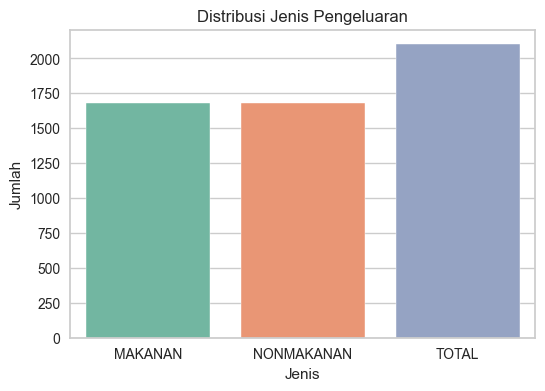

In [11]:
# Visualisasi distribusi jenis pengeluaran
plt.figure(figsize=(6,4))
sns.countplot(x=df['jenis'], hue=df['jenis'], palette='Set2', legend=False)
plt.title("Distribusi Jenis Pengeluaran")
plt.xlabel("Jenis")
plt.ylabel("Jumlah")
plt.show()

In [12]:
# Total semua kategori jenis pengeluaran
print(df['jenis'].value_counts())

jenis
TOTAL         2100
MAKANAN       1680
NONMAKANAN    1680
Name: count, dtype: int64


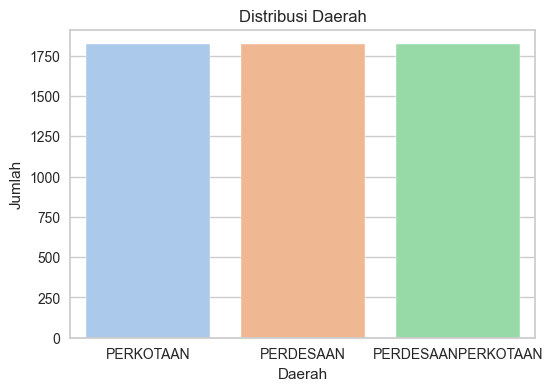

In [13]:
# Visualisasi distribusi daerah (perkotaan/perdesaan)
plt.figure(figsize=(6,4))
sns.countplot(x=df['daerah'], hue=df['daerah'], palette='pastel', legend=False)
plt.title("Distribusi Daerah")
plt.xlabel("Daerah")
plt.ylabel("Jumlah")
plt.show()

In [14]:
# Total semua kategori daerah
print(df['daerah'].value_counts())

daerah
PERKOTAAN             1820
PERDESAAN             1820
PERDESAANPERKOTAAN    1820
Name: count, dtype: int64


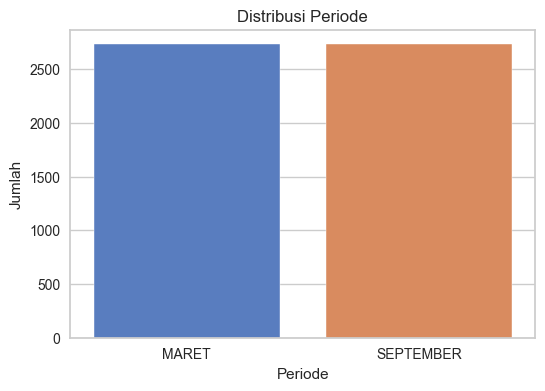

In [15]:
# Visualisasi distribusi periode (Maret/September)
plt.figure(figsize=(6,4))
sns.countplot(x=df['periode'], hue=df['periode'], palette='muted', legend=False)
plt.title("Distribusi Periode")
plt.xlabel("Periode")
plt.ylabel("Jumlah")
plt.show()

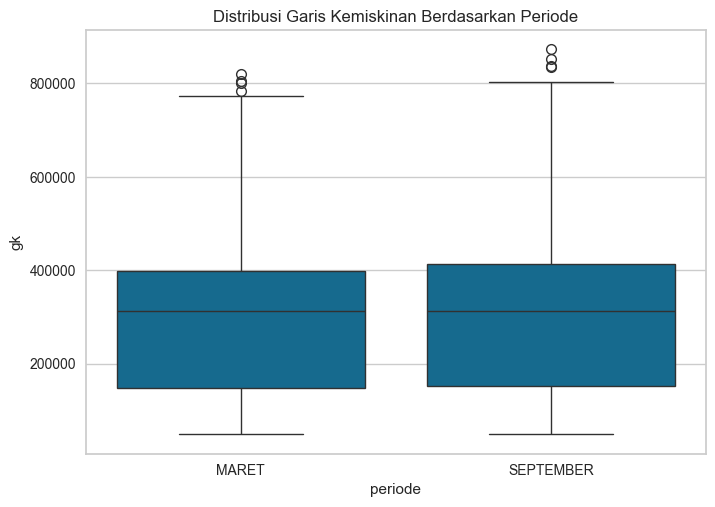

In [16]:
# Cek perubahan signifikan dalam garis kemiskinan (gk) antara kedua periode
sns.boxplot(x=df['periode'], y=df['gk'])
plt.title("Distribusi Garis Kemiskinan Berdasarkan Periode")
plt.show()

In [17]:
# Total semua kategori periode
print(df['periode'].value_counts())

# Cek apakah hanya ada dua kategori valid: "MARET" dan "SEPTEMBER"
print(df['periode'].unique())

periode
MARET        2730
SEPTEMBER    2730
Name: count, dtype: int64
['MARET' 'SEPTEMBER']


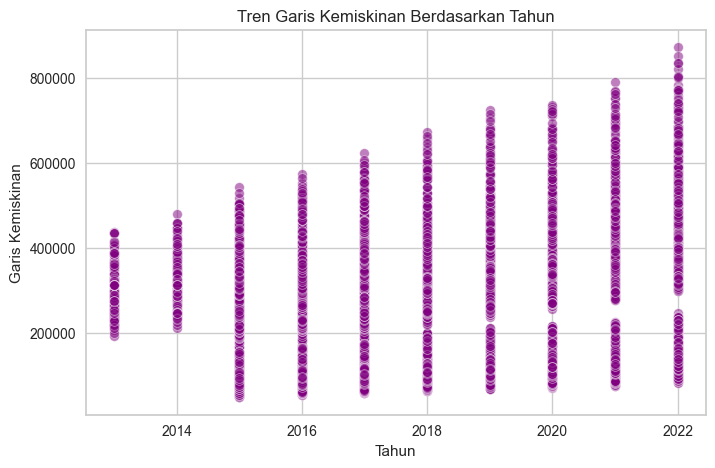

In [18]:
# Scatter plot untuk melihat hubungan antara `tahun` dan `gk`
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['tahun'], y=df['gk'], alpha=0.5, color='purple')
plt.title("Tren Garis Kemiskinan Berdasarkan Tahun")
plt.xlabel("Tahun")
plt.ylabel("Garis Kemiskinan")
plt.show()

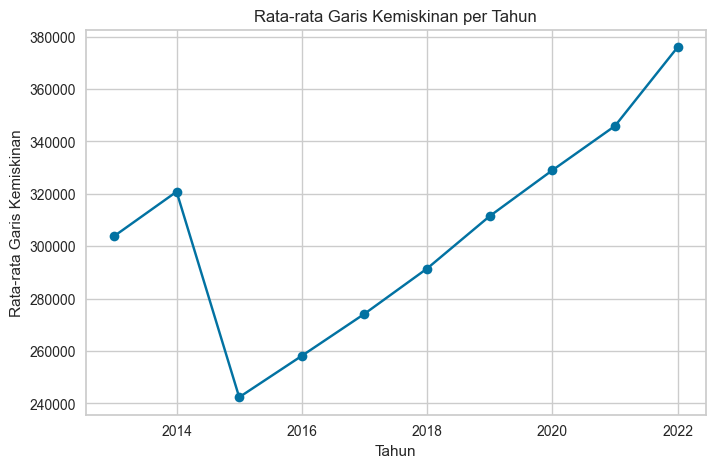

In [19]:
# Cek Tren Pertumbuhan Garis Kemiskinan dari Tahun ke Tahun
df.groupby('tahun')['gk'].mean().plot(kind='line', marker='o', figsize=(8,5))
plt.title("Rata-rata Garis Kemiskinan per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Rata-rata Garis Kemiskinan")
plt.grid(True)
plt.show()

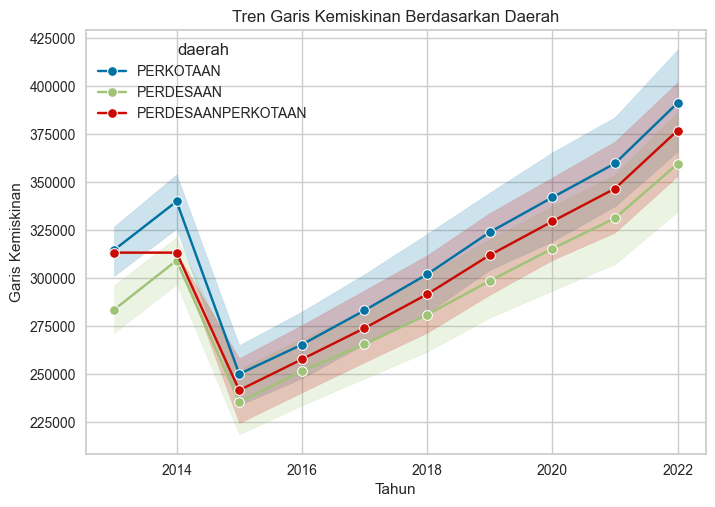

In [20]:
# Membandingkan Tren antara Perkotaan dan Perdesaan
sns.lineplot(x='tahun', y='gk', hue='daerah', data=df, marker='o')
plt.title("Tren Garis Kemiskinan Berdasarkan Daerah")
plt.xlabel("Tahun")
plt.ylabel("Garis Kemiskinan")
plt.show()

In [21]:
# Cek tahun dengan kenaikan terbesar dan provinsi mana yang terdampak
df.groupby(['tahun', 'provinsi'])['gk'].mean().reset_index().sort_values(by=['tahun', 'gk'], ascending=False).head(10)

,tahun,provinsi,gk
332,2022,KEP. BANGKA BELITUNG,552162.611111
331,2022,KALIMANTAN UTARA,520573.222222
330,2022,KALIMANTAN TIMUR,497527.777778
333,2022,KEP. RIAU,465784.888889
340,2022,PAPUA BARAT,459970.055556
320,2022,DKI JAKARTA,440503.555556
339,2022,PAPUA,439224.944444
335,2022,MALUKU,435018.222222
347,2022,SUMATERA BARAT,421525.888889
341,2022,RIAU,421092.333333


In [22]:
# Filter data hanya untuk tahun 2015
df_2015 = df[df['tahun'] == 2015]

# Melihat provinsi dengan garis kemiskinan tertinggi tahun 2015
df_2015.groupby('provinsi')['gk'].mean().reset_index().sort_values(by='gk', ascending=False).head(10)

,provinsi,gk
17,KEP. BANGKA BELITUNG,339473.000000
5,DKI JAKARTA,324526.166667
16,KALIMANTAN UTARA,322136.944444
15,KALIMANTAN TIMUR,320885.222222
18,KEP. RIAU,305186.444444
25,PAPUA BARAT,303340.888889
24,PAPUA,274967.944444
26,RIAU,272376.111111
20,MALUKU,268318.333333
0,ACEH,266577.333333


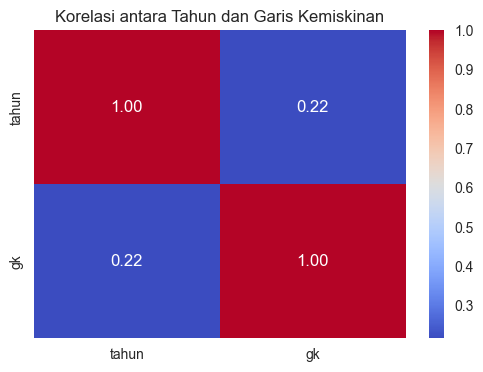

In [23]:
# Heatmap korelasi
plt.figure(figsize=(6,4))
sns.heatmap(df[['tahun', 'gk']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi antara Tahun dan Garis Kemiskinan")
plt.show()

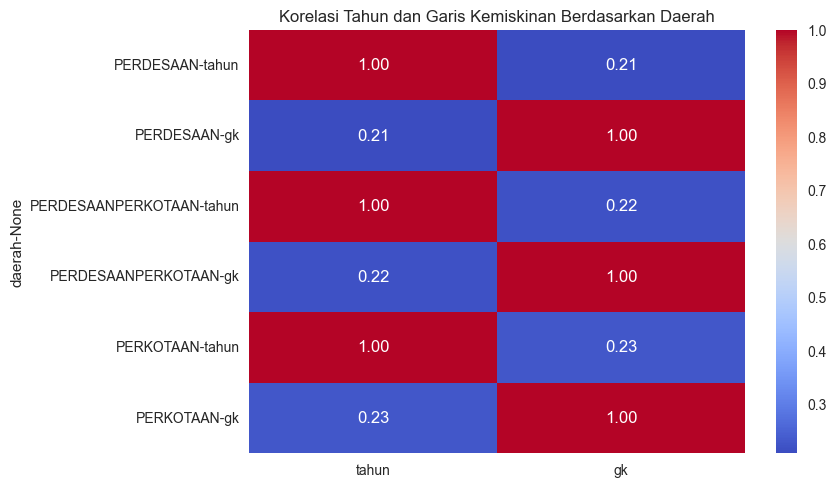

In [24]:
# Heatmap korelasi berdasarkan Daerah dan Provinsi
sns.heatmap(df.groupby('daerah')[['tahun', 'gk']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Tahun dan Garis Kemiskinan Berdasarkan Daerah")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [25]:
# Cek jumlah data duplikat sebelum penghapusan
print(f"Jumlah data duplikat sebelum dihapus: {df.duplicated().sum()}")

# Hapus duplikat jika ada
df = df.drop_duplicates()

# Cek ulang jumlah data duplikat setelah penghapusan
print(f"Jumlah data duplikat setelah dihapus: {df.duplicated().sum()}")

Jumlah data duplikat sebelum dihapus: 0
Jumlah data duplikat setelah dihapus: 0


In [26]:
# Cek apakah "INDONESIA" ada
print("Sebelum penghapusan:")
print(df['provinsi'].unique())

# Menghapus baris dengan provinsi "INDONESIA"
df = df[df['provinsi'] != 'INDONESIA']

# Cek apakah "INDONESIA" masih ada setelah dihapus
print("\nSetelah penghapusan:")
print(df['provinsi'].unique())  # Menampilkan daftar provinsi unik setelah dihapus

Sebelum penghapusan:
['ACEH' 'SUMATERA UTARA' 'SUMATERA BARAT' 'RIAU' 'JAMBI'
 'SUMATERA SELATAN' 'BENGKULU' 'LAMPUNG' 'KEP. BANGKA BELITUNG'
 'KEP. RIAU' 'DKI JAKARTA' 'JAWA BARAT' 'JAWA TENGAH' 'DI YOGYAKARTA'
 'JAWA TIMUR' 'BANTEN' 'BALI' 'NUSA TENGGARA BARAT' 'NUSA TENGGARA TIMUR'
 'KALIMANTAN BARAT' 'KALIMANTAN TENGAH' 'KALIMANTAN SELATAN'
 'KALIMANTAN TIMUR' 'KALIMANTAN UTARA' 'SULAWESI UTARA' 'SULAWESI TENGAH'
 'SULAWESI SELATAN' 'SULAWESI TENGGARA' 'GORONTALO' 'SULAWESI BARAT'
 'MALUKU' 'MALUKU UTARA' 'PAPUA BARAT' 'PAPUA' 'INDONESIA']

Setelah penghapusan:
['ACEH' 'SUMATERA UTARA' 'SUMATERA BARAT' 'RIAU' 'JAMBI'
 'SUMATERA SELATAN' 'BENGKULU' 'LAMPUNG' 'KEP. BANGKA BELITUNG'
 'KEP. RIAU' 'DKI JAKARTA' 'JAWA BARAT' 'JAWA TENGAH' 'DI YOGYAKARTA'
 'JAWA TIMUR' 'BANTEN' 'BALI' 'NUSA TENGGARA BARAT' 'NUSA TENGGARA TIMUR'
 'KALIMANTAN BARAT' 'KALIMANTAN TENGAH' 'KALIMANTAN SELATAN'
 'KALIMANTAN TIMUR' 'KALIMANTAN UTARA' 'SULAWESI UTARA' 'SULAWESI TENGAH'
 'SULAWESI SELATAN' 'SULAWES

In [27]:
# Hitung Q1 (25%) dan Q3 (75%)
Q1 = df['gk'].quantile(0.25)
Q3 = df['gk'].quantile(0.75)

# Hitung IQR
IQR = Q3 - Q1

# Tentukan batas bawah dan batas atas
batas_bawah = Q1 - (1.5 * IQR)
batas_atas = Q3 + (1.5 * IQR)

# Cek jumlah outlier
outliers = df[(df['gk'] < batas_bawah) | (df['gk'] > batas_atas)]
print(f"Jumlah Outlier: {outliers.shape[0]}")

Jumlah Outlier: 9


In [28]:
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi kolom `gk`
df['gk_scaled'] = scaler.fit_transform(df[['gk']])

# Cek hasil normalisasi
df[['gk', 'gk_scaled']].head()

,gk,gk_scaled
0,293697.0,0.297393
1,302128.0,0.307622
2,306243.0,0.312614
3,319768.0,0.329022
4,297479.0,0.301982


In [29]:
# Inisialisasi LabelEncoder
label_enc = LabelEncoder()

# Melakukan encoding untuk kolom yang kategorikal
df['provinsi_encoded'] = label_enc.fit_transform(df['provinsi'])
df['jenis_encoded'] = label_enc.fit_transform(df['jenis'])
df['daerah_encoded'] = label_enc.fit_transform(df['daerah'])
df['periode_encoded'] = label_enc.fit_transform(df['periode'])

# Menampilkan hasil encoding
print(df[['provinsi', 'provinsi_encoded', 'jenis', 'jenis_encoded', 'daerah', 'daerah_encoded', 'periode', 'periode_encoded']].head())

  provinsi  provinsi_encoded    jenis  jenis_encoded     daerah  \
0     ACEH                 0  MAKANAN              0  PERKOTAAN   
1     ACEH                 0  MAKANAN              0  PERKOTAAN   
2     ACEH                 0  MAKANAN              0  PERKOTAAN   
3     ACEH                 0  MAKANAN              0  PERKOTAAN   
4     ACEH                 0  MAKANAN              0  PERDESAAN   

   daerah_encoded    periode  periode_encoded  
0               2      MARET                0  
1               2  SEPTEMBER                1  
2               2      MARET                0  
3               2  SEPTEMBER                1  
4               0      MARET                0  


In [30]:
# Menambahkan kategori berdasarkan Pulau
pulau_mapping = {
    'ACEH': 'Sumatra', 'SUMATERA UTARA': 'Sumatra', 'SUMATERA BARAT': 'Sumatra', 'RIAU': 'Sumatra',
    'JAMBI': 'Sumatra', 'SUMATERA SELATAN': 'Sumatra', 'BENGKULU': 'Sumatra', 'LAMPUNG': 'Sumatra',
    'DKI JAKARTA': 'Jawa', 'JAWA BARAT': 'Jawa', 'JAWA TENGAH': 'Jawa', 'DI YOGYAKARTA': 'Jawa',
    'JAWA TIMUR': 'Jawa', 'BANTEN': 'Jawa',
    'BALI': 'Bali & Nusa Tenggara', 'NUSA TENGGARA BARAT': 'Bali & Nusa Tenggara', 'NUSA TENGGARA TIMUR': 'Bali & Nusa Tenggara',
    'KALIMANTAN BARAT': 'Kalimantan', 'KALIMANTAN TENGAH': 'Kalimantan', 'KALIMANTAN SELATAN': 'Kalimantan', 'KALIMANTAN TIMUR': 'Kalimantan',
    'KALIMANTAN UTARA': 'Kalimantan',
    'SULAWESI UTARA': 'Sulawesi', 'SULAWESI TENGAH': 'Sulawesi', 'SULAWESI SELATAN': 'Sulawesi', 'SULAWESI TENGGARA': 'Sulawesi',
    'GORONTALO': 'Sulawesi', 'SULAWESI BARAT': 'Sulawesi',
    'MALUKU': 'Maluku & Papua', 'MALUKU UTARA': 'Maluku & Papua', 'PAPUA BARAT': 'Maluku & Papua', 'PAPUA': 'Maluku & Papua'
}

# Menambahkan kolom 'pulau' berdasarkan provinsi
df['pulau'] = df['provinsi'].map(pulau_mapping)

# Menambahkan kategori berdasarkan garis kemiskinan (gk)
bins = [0, 200000, 400000, 600000, df['gk'].max()]
labels = ['Sangat Rendah', 'Rendah', 'Menengah', 'Tinggi']
df['gk_category'] = pd.cut(df['gk'], bins=bins, labels=labels)

# Cek distribusi kategori berdasarkan gk
print("Distribusi kategori berdasarkan garis kemiskinan:")
print(df['gk_category'].value_counts())

# Cek distribusi berdasarkan pulau
print("\nDistribusi data berdasarkan pulau:")
print(df['pulau'].value_counts())

Distribusi kategori berdasarkan garis kemiskinan:
gk_category
Rendah           2338
Sangat Rendah    1555
Menengah         1222
Tinggi            189
Name: count, dtype: int64

Distribusi data berdasarkan pulau:
pulau
Sumatra                 1248
Jawa                     936
Sulawesi                 936
Kalimantan               780
Maluku & Papua           624
Bali & Nusa Tenggara     468
Name: count, dtype: int64


In [31]:
# Melakukan encoding untuk kolom yang kategorikal
df['gk_category_encoded'] = label_enc.fit_transform(df['gk_category'])
df['pulau_encoded'] = label_enc.fit_transform(df['pulau'])

# Menampilkan hasil encoding
print(df[['gk_category', 'gk_category_encoded', 'pulau', 'pulau_encoded']].head())

  gk_category  gk_category_encoded    pulau  pulau_encoded
0      Rendah                    1  Sumatra              5
1      Rendah                    1  Sumatra              5
2      Rendah                    1  Sumatra              5
3      Rendah                    1  Sumatra              5
4      Rendah                    1  Sumatra              5


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [32]:
# Menentukan jumlah cluster awal
kmeans = KMeans(n_clusters=4, random_state=42)

# Melatih model dengan data yang telah diproses menggunakan data encoded
features = ['provinsi_encoded', 'jenis_encoded', 'daerah_encoded', 'periode_encoded', 'tahun', 'pulau_encoded', 'gk', 'gk_category_encoded']
X = df[features]

# Fit model ke data
kmeans.fit(X)

# Tambahkan hasil clustering ke dalam dataframe
df['cluster'] = kmeans.labels_

# Cek hasil clustering
df.head()

,provinsi,jenis,daerah,tahun,periode,gk,gk_scaled,provinsi_encoded,jenis_encoded,daerah_encoded,periode_encoded,pulau,gk_category,gk_category_encoded,pulau_encoded,cluster
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0,0.297393,0,0,2,0,Sumatra,Rendah,1,5,0
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0,0.307622,0,0,2,1,Sumatra,Rendah,1,5,0
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,306243.0,0.312614,0,0,2,0,Sumatra,Rendah,1,5,0
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0,0.329022,0,0,2,1,Sumatra,Rendah,1,5,0
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,297479.0,0.301982,0,0,0,0,Sumatra,Rendah,1,5,0


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

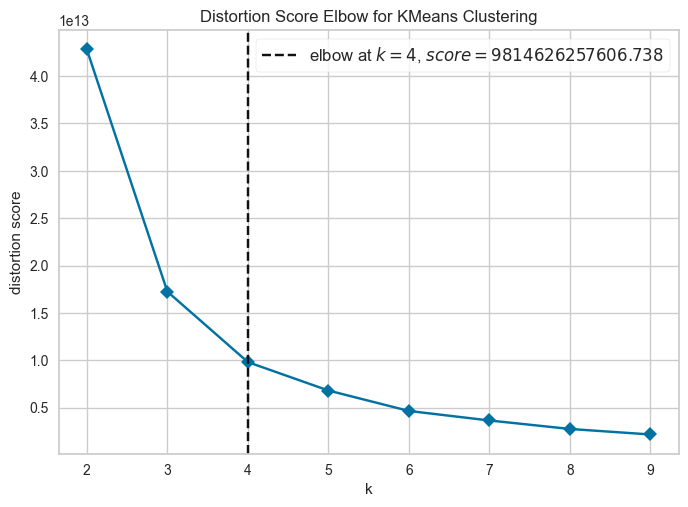

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
# Inisialisasi model K-Means
model = KMeans(random_state=42)

# Menggunakan KElbowVisualizer untuk menemukan jumlah cluster optimal
visualizer = KElbowVisualizer(model, k=(2,10), metric='distortion', timings=False)
visualizer.fit(X)  # Latih model
visualizer.show()

In [34]:
# Hitung silhouette score untuk model KMeans
sil_score = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score untuk {kmeans.n_clusters} cluster: {sil_score:.4f}")

Silhouette Score untuk 4 cluster: 0.6100


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakabagn kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

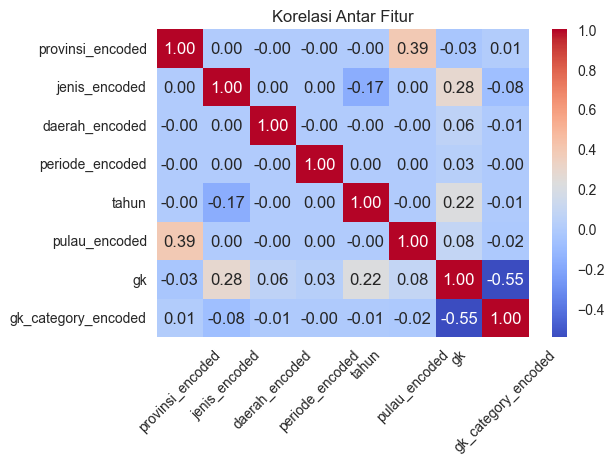

In [35]:
# Cek korelasi antar fitur
plt.figure(figsize=(6,4))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Antar Fitur")
plt.xticks(rotation=45)
plt.show()

In [48]:
# Menghapus fitur yang memiliki korelasi sangat rendah dengan 'gk'
X_selected = df[['provinsi_encoded', 'gk']]  # Memilih fitur yang relevan

# Inisialisasi model KMeans dengan jumlah cluster yang optimal
kmeans_selected = KMeans(n_clusters=4, random_state=42)
kmeans_selected.fit(X_selected)

# Mendapatkan label cluster
labels_selected = kmeans_selected.labels_

# Evaluasi menggunakan Silhouette Score
sil_score_selected = silhouette_score(X_selected, labels_selected)
print(f"Silhouette Score setelah fitur terpilih: {sil_score_selected:.4f}")

Silhouette Score setelah fitur terpilih: 0.6103


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

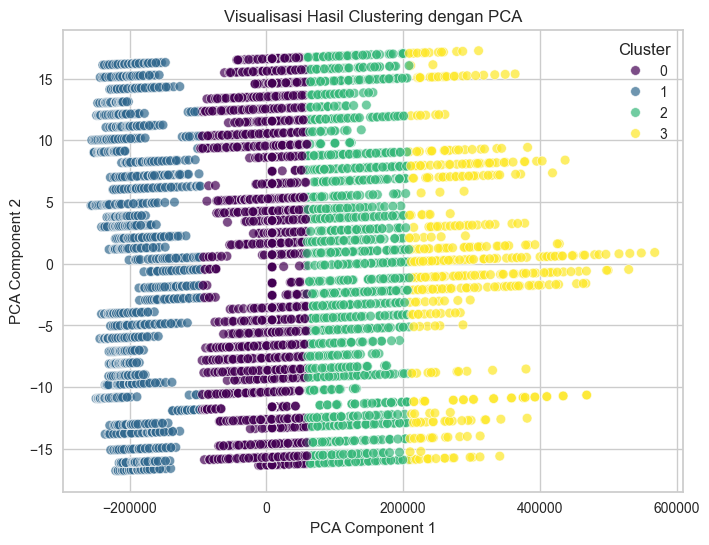

In [37]:
# Reduksi ke 2 dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Masukkan hasil PCA ke DataFrame
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

# Scatter plot hasil clustering
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['pca1'], y=df['pca2'], hue=df['cluster'], palette='viridis', alpha=0.7)
plt.title("Visualisasi Hasil Clustering dengan PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Berikut adalah proses untuk menganalisis dan menginterpretasi hasil clustering berdasarkan data yang sudah dikelompokkan menggunakan KMeans. Kami akan melihat karakteristik tiap cluster berdasarkan fitur yang tersedia, dengan melihat rata-rata nilai dari beberapa fitur (seperti **gk, tahun, provinsi, jenis, dan daerah**) dalam setiap cluster.

In [63]:
# Analisis rata-rata dan statistik lainnya untuk tiap cluster
df['Cluster'] = kmeans.labels_

cluster_summary = df.groupby('Cluster')[['gk', 'tahun', 'provinsi_encoded', 'jenis_encoded', 'daerah_encoded']].agg(['mean', 'min', 'max'])
print(cluster_summary)

                    gk                            tahun              \
                  mean       min       max         mean   min   max   
Cluster                                                               
0        300497.126745  208787.0  364251.0  2016.832975  2013  2022   
1        116211.478370   48561.0  208186.0  2018.363009  2013  2022   
2        427531.021261  364320.0  513614.0  2018.816716  2013  2022   
3        598780.933747  513739.0  872843.0  2020.260870  2015  2022   

        provinsi_encoded         jenis_encoded         daerah_encoded          
                    mean min max          mean min max           mean min max  
Cluster                                                                        
0              16.365199   0  33      0.811493   0   2       0.946294   0   2  
1              16.851411   0  33      0.987461   0   2       0.996865   0   2  
2              16.471408   0  33      1.280059   0   2       1.027126   0   2  
3              15.9399

## Analisis dan Interpretasi Hasil Cluster
### Cluster 0:
- **Rata-rata Garis Kemiskinan (gk)**: 300,497
- **Tahun**: Rata-rata 2016.83 (Rentang: 2013 - 2022)
- **Provinsi (Encoded)**: Rata-rata 16.37 (Rentang: 0 - 33)
- **Jenis Pengeluaran (Encoded)**: Rata-rata 0.81 (lebih banyak untuk makanan)
- **Daerah (Encoded)**: Rata-rata 0.95 (lebih banyak berasal dari perkotaan)
#### Interpretasi:
Cluster ini mencakup daerah dengan tingkat kemiskinan menengah (gk sekitar 300,000). Pengeluaran dominan adalah untuk makanan, dan daerah ini sebagian besar berasal dari perkotaan. Ini menunjukkan bahwa daerah perkotaan memiliki lebih banyak pengeluaran untuk kebutuhan dasar seperti makanan, namun tingkat kemiskinan masih berada pada level menengah. Dari segi bisnis, strategi pemasaran bisa lebih difokuskan pada kebutuhan dasar di daerah perkotaan dengan potensi daya beli yang cukup moderat.

### Cluster 1:
- **Rata-rata Garis Kemiskinan (gk)**: 116,211
- **Tahun**: Rata-rata 2018.36 (Rentang: 2013 - 2022)
- **Provinsi (Encoded)**: Rata-rata 16.85 (Rentang: 0 - 33)
- **Jenis Pengeluaran (Encoded)**: Rata-rata 0.99 (lebih banyak untuk makanan)
- **Daerah (Encoded)**: Rata-rata 0.99 (lebih banyak berasal dari perkotaan)
#### Interpretasi:
Cluster ini terdiri dari daerah dengan tingkat kemiskinan yang lebih rendah (gk sekitar 116,000). Pengeluaran lebih dominan untuk makanan, dan daerah ini sebagian besar berasal dari perkotaan. Hal ini menunjukkan bahwa daerah perkotaan dengan tingkat kemiskinan rendah cenderung menghabiskan sebagian besar pendapatan mereka untuk kebutuhan pangan. Bisnis yang berfokus pada produk makanan dan kebutuhan dasar lainnya dapat memanfaatkan kondisi ini untuk menawarkan produk dengan harga yang lebih kompetitif.

### Cluster 2:
- **Rata-rata Garis Kemiskinan (gk)**: 427,531
- **Tahun**: Rata-rata 2018.82 (Rentang: 2013 - 2022)
- **Provinsi (Encoded)**: Rata-rata 16.47 (Rentang: 0 - 33)
- **Jenis Pengeluaran (Encoded)**: Rata-rata 1.28 (lebih banyak untuk non-makanan)
- **Daerah (Encoded)**: Rata-rata 1.03 (sebagian besar berasal dari perdesaan)
#### Interpretasi:
Cluster ini menunjukkan daerah dengan tingkat kemiskinan lebih tinggi (gk sekitar 427,000). Pengeluaran lebih banyak untuk non-makanan, dan mayoritas berasal dari daerah perdesaan. Ini menunjukkan bahwa meskipun daerah ini memiliki tingkat kemiskinan yang lebih tinggi, pengeluaran lebih banyak untuk kebutuhan non-makanan (seperti transportasi atau barang-barang lain yang lebih tahan lama). Di sini, kebijakan atau produk yang lebih terjangkau dan berguna dalam jangka panjang, seperti produk peralatan rumah tangga atau barang non-makanan, bisa lebih sesuai.

### Cluster 3:
- **Rata-rata Garis Kemiskinan (gk)**: 598,780
- **Tahun**: Rata-rata 2020.26 (Rentang: 2015 - 2022)
- **Provinsi (Encoded)**: Rata-rata 15.94 (Rentang: 0 - 33)
- **Jenis Pengeluaran (Encoded)**: Rata-rata 1.82 (lebih banyak untuk non-makanan)
- **Daerah (Encoded)**: Rata-rata 1.14 (lebih banyak berasal dari perdesaan)
#### Interpretasi:
Cluster ini mencakup daerah dengan tingkat kemiskinan sangat tinggi (gk sekitar 598,000). Pengeluaran dominan adalah untuk non-makanan, dan sebagian besar berasal dari daerah perdesaan. Ini menunjukkan bahwa meskipun daerah ini memiliki tingkat kemiskinan yang lebih tinggi, pengeluaran mereka lebih cenderung untuk barang atau layanan yang tidak terkait langsung dengan makanan. Ini bisa menunjukkan kebutuhan untuk barang-barang lebih tahan lama atau barang-barang yang mendukung kebutuhan hidup lainnya. Dalam bisnis, ini menunjukkan peluang untuk menyediakan produk atau layanan yang lebih berkualitas namun tetap terjangkau untuk daerah dengan tingkat kemiskinan yang lebih tinggi.

## Pola yang Dapat Dimanfaatkan:
1. Pengeluaran untuk Makanan vs Non-Makanan: Ada pola yang jelas bahwa cluster dengan pengeluaran lebih banyak untuk makanan cenderung berasal dari daerah perkotaan dan dengan tingkat kemiskinan lebih rendah, sedangkan daerah yang menghabiskan lebih banyak untuk non-makanan cenderung berasal dari perdesaan dan memiliki tingkat kemiskinan lebih tinggi.

2. Perkotaan vs Perdesaan: Daerah perkotaan sering kali terkait dengan tingkat kemiskinan lebih rendah dan pengeluaran untuk kebutuhan dasar (makanan), sedangkan daerah perdesaan seringkali terkait dengan tingkat kemiskinan lebih tinggi dan pengeluaran lebih banyak untuk barang atau layanan non-makanan.

3. Tahun dan Tren Kemiskinan: Tahun yang lebih baru menunjukkan adanya fluktuasi signifikan dalam pengeluaran, dengan daerah yang lebih terpengaruh oleh kondisi sosial-ekonomi yang berubah.

Dari analisis clustering ini, kita bisa mengambil insight bisnis dan kebijakan terkait pengeluaran berdasarkan daerah, tingkat kemiskinan, dan jenis barang yang dibeli.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [64]:
# Mengekspor DataFrame df_original ke file CSV
df.to_csv('Dataset_inisiasi.csv', index=False)

print("Data telah berhasil diekspor ke 'Dataset_inisiasi.csv'")


Data telah berhasil diekspor ke 'Dataset_inisiasi.csv'
